In [1]:
import state_space
import numpy as np

In [2]:
def x1_dot(*states):
    x1_dot = states[1]
    return x1_dot

def x2_dot(*states):
    m=0.1
    L=1
    b=0.05
    g=9.81
    x2_dot = -(b/m)*states[1]-(g/L)*np.sin(states[0])
    return x2_dot

2º order system defined


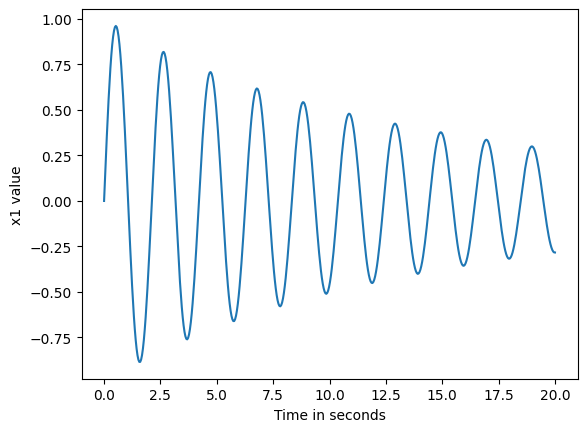

In [4]:
Solver = state_space.state_space("euler", *[x1_dot, x2_dot])
Solver.runSimulation(0, 20, 0.04, *[0, 3])
Solver.plot2DResults(1)